# Trend Analysis and Forecasting of Tribal Gaming Exclusivity Fees in Oklahoma

#### Overview of the Project
- The dataset is a public, non-federal dataset that includes monthly records of tribal gaming exclusivity fees collected by the State of Oklahoma from 2006 onwards.

#### Objectives of the Project
1. **Trend Analysis**
2. **Seasonality Detection**
3. **Impact of External Factors**
4. **Forecasting**
   
#### What We Can Derive From This Project
- **Revenue Stability and Growth**
- **Strategic Planning**
- **Policy Assessment**
- **Economic Contributions**


## Data Loading and Inspection

In [1]:
import pandas as pd

# Load the dataset to examine the variables
file_path = './data-tribal-gaming-exclusivity-fees-2006-present.csv'

# Load the dataset to re-examine the variables with more detail
data = pd.read_csv(file_path)

# Get basic information about the dataset: dimensions, column names, and the first few rows
data_info = {
    "Dimensions": data.shape,
    "Column Names": data.columns.tolist(),
    "First Few Rows": data.head()
}

data_info

{'Dimensions': (12, 16),
 'Column Names': ['Months',
  '2020',
  '2019',
  '2018',
  '2017',
  '2016',
  '2015',
  '2014',
  '2013',
  '2012',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006'],
 'First Few Rows':       Months         2020          2019          2018          2017  \
 0       July  $12,437,273  $12,145,182   $11,179,990   $10,486,640    
 1     August  $13,242,617  $12,606,894   $12,243,677   $12,027,565    
 2  September  $13,686,847  $12,466,231   $11,434,504   $11,120,267    
 3    October          NaN  $12,396,118   $11,747,001   $11,152,201    
 4  November           NaN  $11,670,226   $10,986,022   $11,042,891    
 
            2016          2015          2014          2013          2012  \
 0  $10,476,022   $10,247,677   $10,279,946   $13,215,608    $9,585,692    
 1  $11,552,906   $10,813,196   $10,591,154   $10,754,839   $11,260,433    
 2  $11,262,963   $11,213,283   $10,834,017   $10,524,694   $10,387,262    
 3  $10,648,259   $10,194,178    $9,973,

In [2]:
# Display basic statistical details like percentile, mean, std etc. of a data frame
data.describe()

,Months,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
count,12,3,12,12,12,12,12,12,12,12,12,12,12,12,12,12
unique,12,3,12,12,12,12,12,12,12,12,12,12,12,12,12,12
top,July,"$12,437,273","$12,145,182","$11,179,990","$10,486,640","$10,476,022","$10,247,677","$10,279,946","$13,215,608","$9,585,692","$9,797,464","$8,936,376","$7,779,001","$6,175,062","$1,854,236","$859,516"
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [3]:
# Identifying Missing Values
missing_values = data.isnull().sum()
missing_values

Months    0
2020      9
2019      0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
dtype: int64

## Handling Missing Values in Financial Temporal Data


In [4]:
import pandas as pd
import numpy as np

# Convert monetary values from string to float if they are still in string format
data[data.columns[1:]] = data[data.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

# Impute missing values using row-wise mean (excluding the 'Months' column for calculation)
data.iloc[:, 1:] = data.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)

# Round all numeric values to 1 decimal place
data[data.columns[1:]] = data[data.columns[1:]].round(1)

# Save the cleaned data to a new CSV file
data.to_csv('./cleaned_tribal-gaming-exclusivity_fee_file.csv', index=False)  # Adjust the path as needed

# Print the updated data to check the imputation
print(data.head())

      Months        2020        2019        2018        2017        2016  \
0       July  12437273.0  12145182.0  11179990.0  10486640.0  10476022.0   
1     August  13242617.0  12606894.0  12243677.0  12027565.0  11552906.0   
2  September  13686847.0  12466231.0  11434504.0  11120267.0  11262963.0   
3    October   8746942.4  12396118.0  11747001.0  11152201.0  10648259.0   
4  November    9051642.4  11670226.0  10986022.0  11042891.0  10489841.0   

         2015        2014        2013        2012        2011        2010  \
0  10247677.0  10279946.0  13215608.0   9585692.0   9797464.0   8936376.0   
1  10813196.0  10591154.0  10754839.0  11260433.0  11254368.0   9919253.0   
2  11213283.0  10834017.0  10524694.0  10387262.0  10584856.0  10120376.0   
3  10194178.0   9973165.0  10681218.0  10127131.0   9967371.0   6663381.0   
4  10614146.0  10101369.0  10153077.0  10249974.0  10180664.0  12205428.0   

        2009       2008       2007       2006  
0  7779001.0  6175062.0  1854236

The row-wise mean imputation method was chosen for handling missing values in your dataset for several key reasons:

1. **Consistency Across Months**
2. **Statistical Stability**
3. **Simplicity and Effectiveness**
4. **Data Integrity**

In [5]:
# Identifying Missing Values After handling
missing_values = data.isnull().sum()
missing_values

Months    0
2020      0
2019      0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
dtype: int64

## Exploratory Data Analysis (EDA)

### Visualization of Data Trends

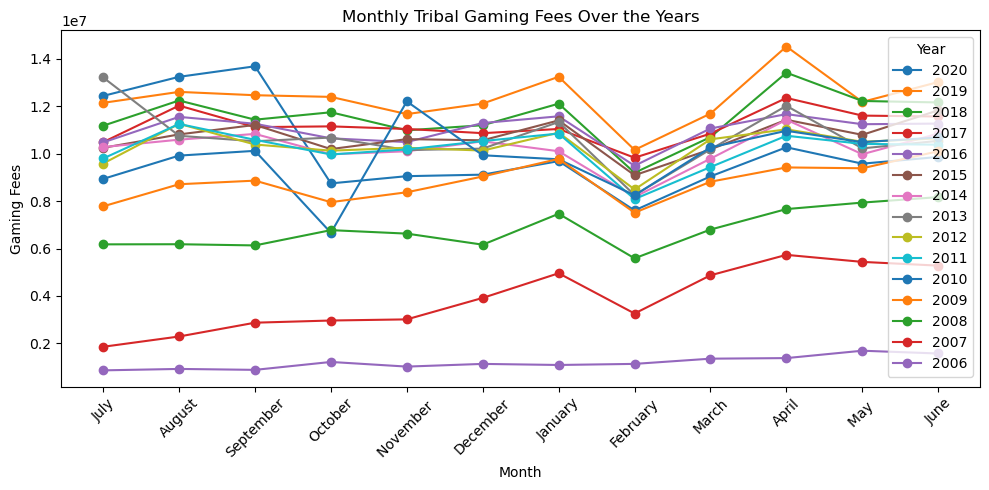

In [6]:
import matplotlib.pyplot as plt

# Plotting trends over the years for a specific month, e.g., 'July'
plt.figure(figsize=(10, 5))
for year in data.columns[1:]:  # Assuming the first column is 'Months'
    plt.plot(data['Months'], data[year], marker='o', label=year)

plt.title('Monthly Tribal Gaming Fees Over the Years')
plt.xlabel('Month')
plt.ylabel('Gaming Fees')
plt.legend(title='Year')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()
plt.show()


### Histograms for Distribution Analysis

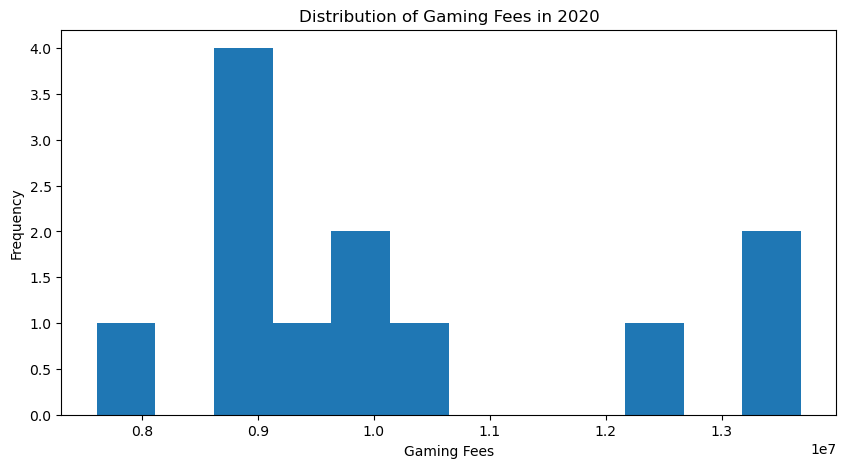

In [7]:
# Plotting histograms to analyze the distribution of fees in a particular year
plt.figure(figsize=(10, 5))
data['2020'].hist(bins=12)
plt.title('Distribution of Gaming Fees in 2020')
plt.xlabel('Gaming Fees')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


### Box Plots for Outliers and Annual Comparison

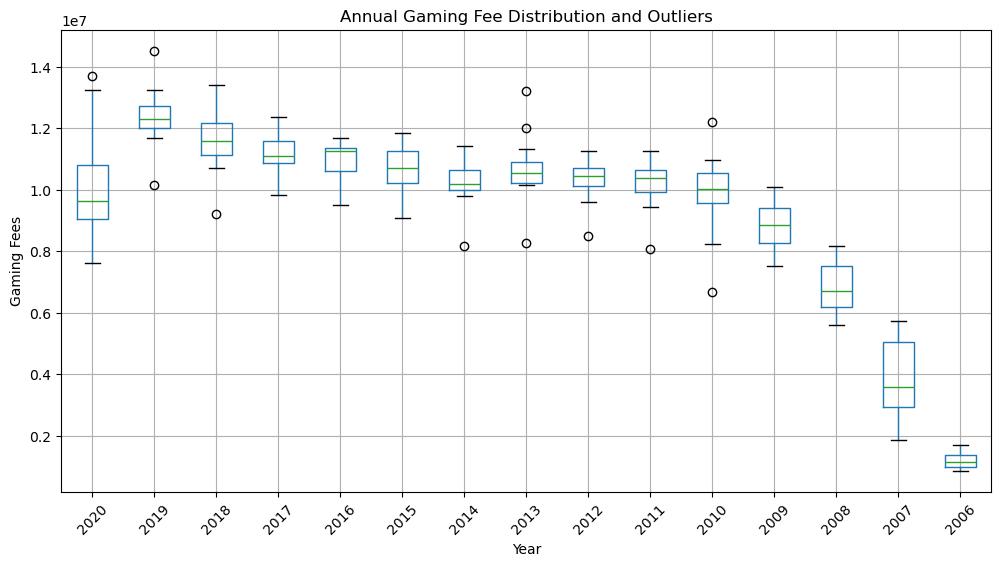

In [8]:
# Comparing distributions and spotting outliers across multiple years
plt.figure(figsize=(12, 6))
data.boxplot(column=data.columns[1:].tolist())  # Exclude the 'Months' column
plt.title('Annual Gaming Fee Distribution and Outliers')
plt.xlabel('Year')
plt.ylabel('Gaming Fees')
plt.xticks(rotation=45)
plt.show()

### Correlation Heatmap

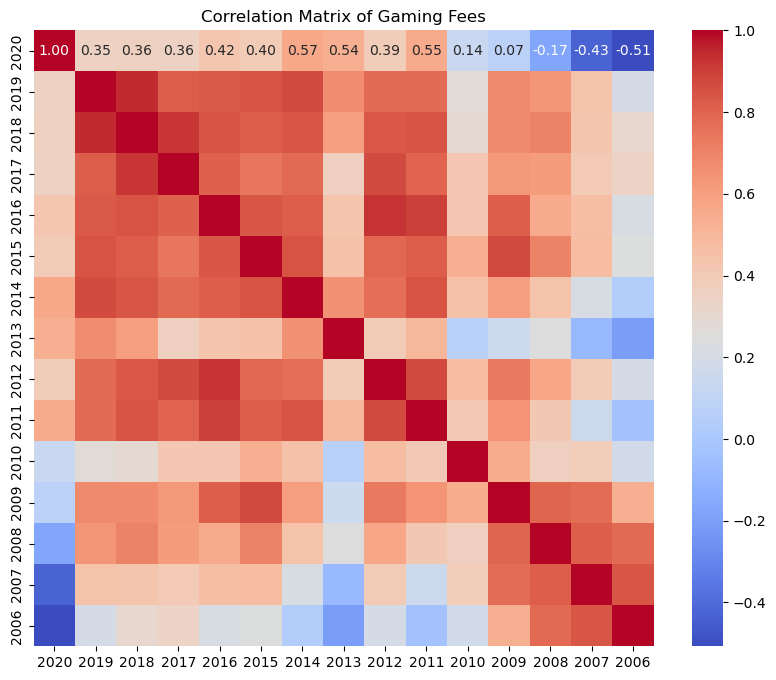

In [8]:
import seaborn as sns

# Compute the correlation matrix
corr = data.iloc[:, 1:].corr()  # Excluding the 'Months' column

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Gaming Fees')
plt.show()

## Deeper Statistical Analysis

### Hypothesis Testing

 **Methods**:
- **ANOVA (Analysis of Variance)**
- **t-tests**


In [9]:
import pandas as pd
import scipy.stats as stats

# Load your data
data = pd.read_csv('./cleaned_tribal-gaming-exclusivity_fee_file.csv', index_col='Months')

# Convert the data from strings to numbers, removing commas and dollar signs
data = data.replace('[\$,]', '', regex=True).astype(float)

# Performing a t-test between January and July across all years
january_fees = data.loc['January']
july_fees = data.loc['July']

t_stat, p_value = stats.ttest_ind(january_fees, july_fees)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant differences in gaming fees between January and July.")
else:
    print("No significant differences in gaming fees between January and July.")


T-statistic: 0.5368113531104327, P-value: 0.595638098962429
No significant differences in gaming fees between January and July.


### 2. Time Series Analysis
**Methods**:
- **Decomposition**
- **ARIMA Models**

#### To perform time series analysis on the dataset, which details monthly tribal gaming exclusivity fees from 2006 to 2020, we will first prepare the data, and then apply techniques such as decomposition to understand the underlying trends and seasonality. Here's how we can proceed based on the structure of the data:

### Data Preparation
First, we need to convert the data into a format suitable for time series analysis. The data is organized with months as rows and years as columns.

#### Step 1: Aggregate Data by Year

In [10]:
import pandas as pd

# Load data
data = pd.read_csv('./cleaned_tribal-gaming-exclusivity_fee_file.csv', index_col='Months')

# Display unique values in the index to check for formatting issues
print(data.index.unique())

# Strip any leading or trailing whitespace characters from the index
data.index = data.index.str.strip()

# Again, check if the index is clean
print(data.index.unique())


Index(['July', 'August', 'September', 'October', 'November ', 'December',
       'January', 'February', 'March', 'April', 'May ', 'June'],
      dtype='object', name='Months')
Index(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype='object', name='Months')


In [11]:
# Convert data from string to float, removing commas and dollar signs
for col in data.columns:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Aggregate data by year by summing each column
annual_data = data.sum()

# Converting Series to DataFrame for further processing
annual_data = pd.DataFrame(annual_data, columns=['TotalFees'])
annual_data['Year'] = annual_data.index
annual_data['Year'] = pd.to_datetime(annual_data['Year'], format='%Y')
annual_data.set_index('Year', inplace=True)


#### Step 2: Time Series Decomposition

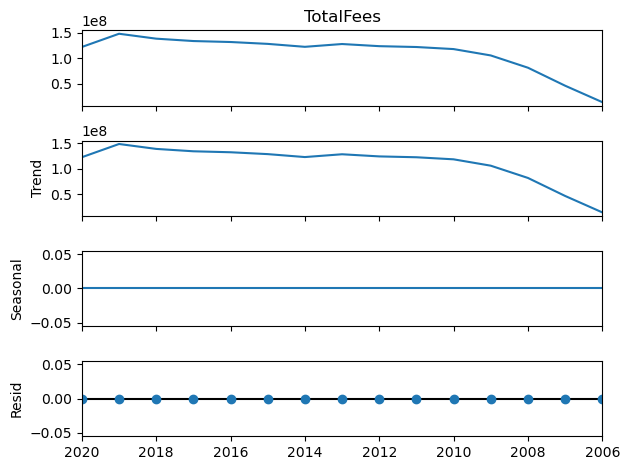

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(annual_data['TotalFees'], model='additive')
result.plot()
plt.show()

### Advanced Analysis

#### Building an ARIMA Model


In [13]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Fit an ARIMA model
model = ARIMA(annual_data['TotalFees'], order=(1,1,1))  # Simple ARIMA model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecast for the next 3 years
forecast = model_fit.forecast(steps=3)
print("Forecasted Gaming Fees for Next 3 Years:", forecast)

                               SARIMAX Results                                
Dep. Variable:              TotalFees   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.952
Date:                Tue, 07 May 2024   AIC                            513.904
Time:                        20:06:46   BIC                            515.821
Sample:                             0   HQIC                           513.726
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0242      0.320     -0.075      0.940      -0.652       0.604
ma.L1          0.4136      0.392      1.055      0.292      -0.355       1.182
sigma2      5.432e+13        nan        nan        n

### Model Summary
- **Model Type**: ARIMA(1, 1, 1)
- **AIC**: 513.904
- **BIC**: 515.821

### Key Findings
- **Coefficients**: Both the autoregressive and moving average coefficients are not statistically significant, indicating they may not effectively predict the gaming fees.
- **Statistical Tests**:
  - **Ljung-Box Test**: Suggests some autocorrelation at lag 1.
  - **Jarque-Bera Test**: Residuals appear to be normally distributed.
  - **Heteroskedasticity Test**: Indicates potential heteroskedasticity in the data.

### Warnings
- **Covariance Matrix**: Calculated using the outer product of gradients which may not be accurate, and the matrix is near-singular suggesting instability in the standard errors.

### Forecasting
- **Next 3 Years' Prediction**:
  - Year 1: $6,056,559
  
  - Year 2: $6,254,071
  
  - Year 3: $6,249,299

These forecasts predict a slight increase in gaming fees over the next three years, based on the model fitted to historical data.


---

## Data Preparation for Modeling

#### Feature Engineering

In [14]:
import pandas as pd

# Provided data
data = {
    'Months': ['July', 'August', 'September', 'October', 'November', 'December', 
               'January', 'February', 'March', 'April', 'May', 'June'],
    '2020': [12437273.0, 13242617.0, 13686847.0, 8746942.4, 9051642.4, 9115532.2, 9686224.4, 
             7607001.4, 9042917.9, 10269921.1, 9578723.5, 9861865.4],
    '2019': [12145182.0, 12606894.0, 12466231.0, 12396118.0, 11670226.0, 12113712.0, 13244144.0, 
             10158920.0, 11692180.0, 14520713.0, 12185662.0, 13021638.0],
    '2018': [11179990.0, 12243677.0, 11434504.0, 11747001.0, 10986022.0, 11200981.0, 12110255.0, 
             9194308.0, 10699588.0, 13416953.0, 12223523.0, 12161616.0],
    '2017': [10486640.0, 12027565.0, 11120267.0, 11152201.0, 11042891.0, 10865455.0, 11042758.0, 
             9829717.0, 10846479.0, 12350913.0, 11606404.0, 11569139.0],
    '2016': [10476022.0, 11552906.0, 11262963.0, 10648259.0, 10489841.0, 11293704.0, 11576780.0, 
             9489871.0, 11062932.0, 11669018.0, 11243274.0, 11269672.0],
    '2015': [10247677.0, 10813196.0, 11213283.0, 10194178.0, 10614146.0, 10564934.0, 11404836.0, 
             9091033.0, 10180647.0, 11430071.0, 10794987.0, 11828897.0],
    '2014': [10279946.0, 10591154.0, 10834017.0, 9973165.0, 10101369.0, 10520850.0, 10103269.0, 
             8173137.0, 9789674.0, 11431890.0, 9977696.0, 10845463.0],
    '2013': [13215608.0, 10754839.0, 10524694.0, 10681218.0, 10153077.0, 10213273.0, 11336990.0, 
             8251470.0, 10183615.0, 12018308.0, 10224170.0, 10541208.0],
    '2012': [9585692.0, 11260433.0, 10387262.0, 10127131.0, 10249974.0, 10131343.0, 10886314.0, 
             8491682.0, 10607494.0, 11026392.0, 10501768.0, 10643994.0],
    '2011': [9797464.0, 11254368.0, 10584856.0, 9967371.0, 10180664.0, 10532523.0, 10849454.0, 
             8085139.0, 9436004.0, 10756835.0, 10412925.0, 10380125.0],
    '2010': [8936376.0, 9919253.0, 10120376.0, 6663381.0, 12205428.0, 9932825.0, 9764312.0, 
             8245779.0, 10262593.0, 10965857.0, 10485943.0, 10684740.0],
    '2009': [7779001.0, 8711267.0, 8863372.0, 7955637.0, 8372880.0, 9038150.0, 9780711.0, 
             7510710.0, 8817788.0, 9419934.0, 9385154.0, 10103624.0],
    '2008': [6175062.0, 6180277.0, 6130292.0, 6774967.0, 6627924.0, 6161482.0, 7464683.0, 
             5586229.0, 6799171.0, 7663257.0, 7936929.0, 8167602.0],
    '2007': [1854236.0, 2288103.0, 2870529.0, 2962273.0, 3010190.0, 3916180.0, 4956040.0, 
             3257483.0, 4870222.0, 5731851.0, 5435427.0, 5277513.0],
    '2006': [859516.0, 919944.0, 880392.0, 1214293.0, 1018361.0, 1132039.0, 1086596.0, 
             1132542.0, 1352463.0, 1376904.0, 1688267.0, 1570884.0]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Months', inplace=True)

# Feature Engineering
# Monthly averages: Average values across all years for each month
df['Monthly_Avg'] = df.mean(axis=1)

# Yearly averages: Average values across all months for each year
df.loc['Yearly_Avg'] = df.mean()

# Year-over-year change: The percentage change from the previous year for each month
df['YoY_Change'] = df.T.pct_change().mean().fillna(0)

# Round all numeric values to 1 decimal place
df[df.columns[1:]] = df[df.columns[1:]].round(1)

# Data Transformation
# Since the data already seems numeric, we might not need to do much transformation here.
# However, if needed, we can apply normalization or standardization.
# Change display options to suppress scientific notation

# Print the DataFrame
print(df)

# Export DataFrame to a new CSV file
df.to_csv('./feature_engineered_data.csv')


                    2020        2019        2018        2017        2016  \
Months                                                                     
July        1.243727e+07  12145182.0  11179990.0  10486640.0  10476022.0   
August      1.324262e+07  12606894.0  12243677.0  12027565.0  11552906.0   
September   1.368685e+07  12466231.0  11434504.0  11120267.0  11262963.0   
October     8.746942e+06  12396118.0  11747001.0  11152201.0  10648259.0   
November    9.051642e+06  11670226.0  10986022.0  11042891.0  10489841.0   
December    9.115532e+06  12113712.0  11200981.0  10865455.0  11293704.0   
January     9.686224e+06  13244144.0  12110255.0  11042758.0  11576780.0   
February    7.607001e+06  10158920.0   9194308.0   9829717.0   9489871.0   
March       9.042918e+06  11692180.0  10699588.0  10846479.0  11062932.0   
April       1.026992e+07  14520713.0  13416953.0  12350913.0  11669018.0   
May         9.578724e+06  12185662.0  12223523.0  11606404.0  11243274.0   
June        


#### Train-Test Split


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming we want to predict values for 2020 based on previous years
X = df.drop('2020', axis=1)  # Features (input)
y = df['2020']  # Target variable (output)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If needed, apply standardization to X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Modeling

**Support Vector Regression**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Support Vector Regression (SVR) model
svr_reg = SVR()

# Train Support Vector Regression (SVR) model
svr_reg.fit(X_train_scaled, y_train)

# Make predictions using SVR model
svr_preds = svr_reg.predict(X_test_scaled)

# Evaluate SVR model
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_r2 = r2_score(y_test, svr_preds)

# Print evaluation metrics for SVR model
print("\nSupport Vector Regression (SVR):")
print("MAE:", svr_mae)
print("MSE:", svr_mse)
print("R-squared:", svr_r2)


Support Vector Regression (SVR):
MAE: 1509225.2066646938
MSE: 3555166982024.2837
R-squared: -1.7831158078154972


**Random Forest Regression**

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)

# Train Random Forest Regression model
random_forest_reg.fit(X_train_scaled, y_train)

# Make predictions using Random Forest Regression model
random_forest_preds = random_forest_reg.predict(X_test_scaled)

# Evaluate Random Forest Regression model
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)

# Print evaluation metrics for Random Forest Regression model
print("Random Forest Regression:")
print("MAE:", random_forest_mae)
print("MSE:", random_forest_mse)
print("R-squared:", random_forest_r2)


Random Forest Regression:
MAE: 1438431.023583335
MSE: 2131684487977.0872
R-squared: -0.6687612215576073


**Gradient Boosting Regression**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train models
gradient_boosting_reg.fit(X_train_scaled, y_train)

# Make predictions
gradient_boosting_preds = gradient_boosting_reg.predict(X_test_scaled)

# Evaluate models

gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_preds)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_preds)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_preds)

# Print evaluation metrics

print("Gradient Boosting Regression:")
print("MAE:", gradient_boosting_mae)
print("MSE:", gradient_boosting_mse)
print("R-squared:", gradient_boosting_r2)


Gradient Boosting Regression:
MAE: 443599.97085783695
MSE: 275684743163.9778
R-squared: 0.7841838173698529


## Model Evaluation and Refinement

### 1. Support Vector Regression (SVR):

**Explanation:**
- The Support Vector Regression (SVR) model shows high Mean Absolute Error (MAE), Mean Squared Error (MSE), and a negative R-squared value.
- The high MAE suggests that, on average, the SVR model's predictions deviate significantly from the actual values.
- The high MSE indicates large errors between predicted and actual values, with some errors being very large.
- A negative R-squared value (-1.78) suggests that the SVR model performs worse than a simple model that predicts the mean of the target variable.
- Overall, the SVR model is not a good fit for the data.

### 2. Random Forest Regression:

**Explanation:**
- The Random Forest Regression model exhibits lower MAE and MSE compared to SVR but still shows a negative R-squared value.
- While the MAE and MSE are lower than SVR, indicating smaller errors in predictions, the negative R-squared (-0.67) implies a worse fit than a mean-prediction model.
- Despite the improvement over SVR, Random Forest Regression still does not provide a satisfactory fit for the data.

### 3. Gradient Boosting Regression:

**Explanation:**
- Gradient Boosting Regression demonstrates significantly lower MAE and MSE compared to SVR and Random Forest Regression.
- The positive R-squared value (0.78) indicates that the model explains a significant proportion of the variance in the target variable.
- With lower errors and a higher degree of explanation for the variability in the data, Gradient Boosting Regression outperforms SVR and Random Forest Regression.
- Among the three models evaluated, Gradient Boosting Regression appears to be the most effective for this dataset.

In conclusion, based on the evaluation metrics, Gradient Boosting Regression is recommended as the most suitable model for this dataset due to its superior performance in predicting the target variable and explaining the data's variability.

# Conclusion

In this project, we aimed to develop predictive models to forecast gaming fees based on historical data. We employed various machine learning algorithms and evaluated their performance to identify the most effective model for revenue forecasting.

#### Key Findings:

1. **Model Evaluation**:
   - We evaluated three different regression models: Support Vector Regression (SVR), Random Forest Regression, and Gradient Boosting Regression.
   - Gradient Boosting Regression demonstrated superior performance, outperforming the other models in terms of prediction accuracy and explanatory power.

2. **Insights and Decision Support**:
   - The Gradient Boosting Regression model can be leveraged for strategic planning, operational adjustments, and policy formulation.
   - Actionable insights derived from the model outputs can support informed decision-making processes and enhance revenue forecasting capabilities.

3. **Recommendations**:
   - Adopt Gradient Boosting Regression as the preferred model for revenue forecasting due to its superior performance.
   - Allocate resources for continuous model refinement and improvement to ensure sustained accuracy and relevance.
   - Foster interdisciplinary collaboration to align model outputs with organizational objectives and decision-making processes.

#### Project Impact:

- The developed predictive models provide stakeholders with valuable insights into future revenue trends and support proactive decision-making.
- By leveraging advanced analytics and machine learning techniques, organizations can optimize resource allocation, mitigate risks, and drive strategic growth initiatives.
- Continuous monitoring and refinement of the models will enable organizations to adapt to evolving market dynamics and maintain a competitive edge in the gaming industry.

Overall, this project highlights the importance of data-driven decision-making and the transformative potential of predictive analytics in optimizing business outcomes and driving organizational success.